In [ ]:
!pip install pybithumb

     |████████████████████████████████| 51 kB 351 kB/s 
     |████████████████████████████████| 111 kB 27.5 MB/s 
     |████████████████████████████████| 251 kB 67.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import pybithumb
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR,SVC


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pybithumb.get_ohlcv('BTC')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2884 entries, 2013-12-27 00:00:00 to 2022-02-16 21:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2884 non-null   float64
 1   high    2884 non-null   float64
 2   low     2884 non-null   float64
 3   close   2884 non-null   float64
 4   volume  2884 non-null   float64
dtypes: float64(5)
memory usage: 135.2 KB


In [ ]:
df

,open,high,low,close,volume
time,,,,,
2013-12-27 00:00:00,737000.0,755000.0,737000.0,755000.0,3.780000
2013-12-28 00:00:00,750000.0,750000.0,750000.0,750000.0,12.000000
2013-12-29 00:00:00,750000.0,750000.0,728000.0,739000.0,19.058000
2013-12-30 00:00:00,740000.0,772000.0,740000.0,768000.0,9.488973
2013-12-31 00:00:00,768000.0,800000.0,763000.0,768000.0,18.650350
...,...,...,...,...,...
2022-02-12 00:00:00,52771000.0,53069000.0,50789000.0,51343000.0,2973.233613
2022-02-13 00:00:00,51343000.0,52300000.0,50987000.0,51872000.0,1799.211438
2022-02-14 00:00:00,51888000.0,52112000.0,50621000.0,51662000.0,3246.622520


In [ ]:
df['return']=np.log(df['close']/df['close'].shift(1))
df.dropna(inplace=True)
df

,open,high,low,close,volume,return
time,,,,,,
2013-12-28 00:00:00,750000.0,750000.0,750000.0,750000.0,12.000000,-0.006645
2013-12-29 00:00:00,750000.0,750000.0,728000.0,739000.0,19.058000,-0.014775
2013-12-30 00:00:00,740000.0,772000.0,740000.0,768000.0,9.488973,0.038492
2013-12-31 00:00:00,768000.0,800000.0,763000.0,768000.0,18.650350,0.000000
2014-01-01 00:00:00,768000.0,795000.0,765000.0,777000.0,65.380334,0.011651
...,...,...,...,...,...,...
2022-02-12 00:00:00,52771000.0,53069000.0,50789000.0,51343000.0,2973.233613,-0.027395
2022-02-13 00:00:00,51343000.0,52300000.0,50987000.0,51872000.0,1799.211438,0.010251
2022-02-14 00:00:00,51888000.0,52112000.0,50621000.0,51662000.0,3246.622520,-0.004057


In [ ]:
cols=[]
lags=3
for lag in range(1,1+lags):
    col=f'lag_{lag}'
    df[col]=df['return'].shift(lag)
    cols.append(col)
df.dropna(inplace=True)

In [ ]:
lm=LogisticRegression(C=1e7,solver='lbfgs',multi_class='auto',max_iter=1000)
lm.fit(df[cols],np.sign(df['return']))


LogisticRegression(C=10000000.0, max_iter=1000)

In [ ]:
df['prediction']=lm.predict(df[cols])

In [ ]:
df['strategy']=df['prediction']*df['return']
df[['return','strategy']].sum().apply(np.exp)

return       69.600260
strategy    990.190045
dtype: float64

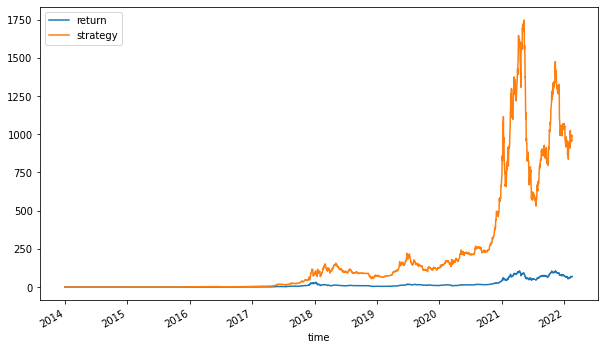

In [ ]:
df[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))